#Download dataset from Kaggle

In [1]:
%cd /content/drive/MyDrive/Programming/Computer Vision/Team/Mid-Term Report

/content/drive/MyDrive/Programming/Computer Vision/Team/Mid-Term Report


In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

 99% 579M/586M [00:06<00:00, 77.6MB/s]
100% 586M/586M [00:06<00:00, 90.4MB/s]


In [ ]:
!unzip animals10.zip

#Original dataset tree

In [ ]:
!sudo apt-get install tree

In [ ]:
!tree raw-img --filelimit 12

raw-img
├── cane [4863 entries exceeds filelimit, not opening dir]
├── cavallo [2623 entries exceeds filelimit, not opening dir]
├── elefante [1446 entries exceeds filelimit, not opening dir]
├── farfalla [2112 entries exceeds filelimit, not opening dir]
├── gallina [3098 entries exceeds filelimit, not opening dir]
├── gatto [1668 entries exceeds filelimit, not opening dir]
├── mucca [1866 entries exceeds filelimit, not opening dir]
├── pecora [1820 entries exceeds filelimit, not opening dir]
├── ragno [4821 entries exceeds filelimit, not opening dir]
└── scoiattolo [1862 entries exceeds filelimit, not opening dir]

10 directories, 0 files


#Taking apart of original dataset

In [ ]:
!mkdir data
!mv raw-img data
%cd data

In [4]:
from pathlib import Path
import os

In [ ]:
# !rm -rf animals10

In [ ]:
new_dir = 'animals10'
os.mkdir(new_dir)

In [ ]:
src = Path('raw-img')
des = Path(new_dir)
for j in ['train','val','test']:
  os.mkdir(des / j)
for i in src.iterdir():
  if i.is_dir():
    for j in des.iterdir():
      if j.is_dir():
        os.mkdir(des/j.name/ i.name)

In [ ]:
from shutil import copy2 as cp

In [ ]:
num = {'train': 400, 'val': 100, 'test': 200}
for j in src.iterdir():
  id = 0
  begin_idx = 0
  for idx_t,t in enumerate(['train','val','test']):
    enum = enumerate(list(j.iterdir())[begin_idx:begin_idx + num[t]])
    begin_idx = begin_idx + num[t]
    for idx_img,img in enum:
      if img.suffix == '.jpeg':
        cp(img,des / t / j.name /f'{j.name}{id}.jpeg')
        id+=1

In [ ]:
!tree animals10 --filelimit 12

animals10
├── test
│   ├── cane [200 entries exceeds filelimit, not opening dir]
│   ├── cavallo [200 entries exceeds filelimit, not opening dir]
│   ├── elefante [200 entries exceeds filelimit, not opening dir]
│   ├── farfalla [200 entries exceeds filelimit, not opening dir]
│   ├── gallina [200 entries exceeds filelimit, not opening dir]
│   ├── gatto [200 entries exceeds filelimit, not opening dir]
│   ├── mucca [200 entries exceeds filelimit, not opening dir]
│   ├── pecora [200 entries exceeds filelimit, not opening dir]
│   ├── ragno [200 entries exceeds filelimit, not opening dir]
│   └── scoiattolo [200 entries exceeds filelimit, not opening dir]
├── train
│   ├── cane [400 entries exceeds filelimit, not opening dir]
│   ├── cavallo [400 entries exceeds filelimit, not opening dir]
│   ├── elefante [400 entries exceeds filelimit, not opening dir]
│   ├── farfalla [400 entries exceeds filelimit, not opening dir]
│   ├── gallina [400 entries exceeds filelimit, not opening dir]
│ 

#EDA new dataset

In [17]:
import matplotlib.pyplot as plt

In [57]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
ds = Path('data/animals10')

In [25]:
list_img = list(ds.glob('**/**/*.jpeg'))

In [31]:
size = lambda img: [img.shape[0],img.shape[1]]

In [64]:
Sizes = [size(np.array(load_img(str(img)))) for img in list_img]

In [70]:
Sizes = np.array(Sizes)

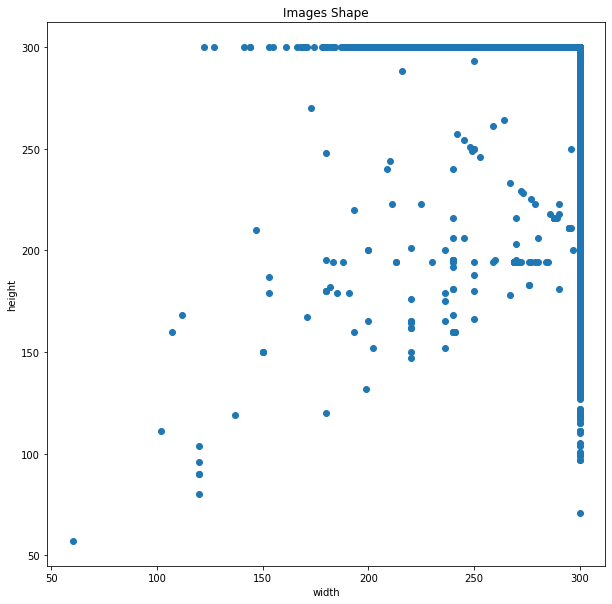

In [96]:
plt.figure(figsize=(10,10))
plt.title('Images Shape')
plt.scatter(Sizes[:,1],Sizes[:,0])
plt.xlabel('width')
plt.ylabel('height')
plt.show()

In [118]:
s = Sizes[:,0]*Sizes[:,1]
r = [i*max(s)//5 for i in range(6)]

In [122]:
HW = [len(s[(s>r[i]) & (s<=r[i+1])]) for i in range(5)]

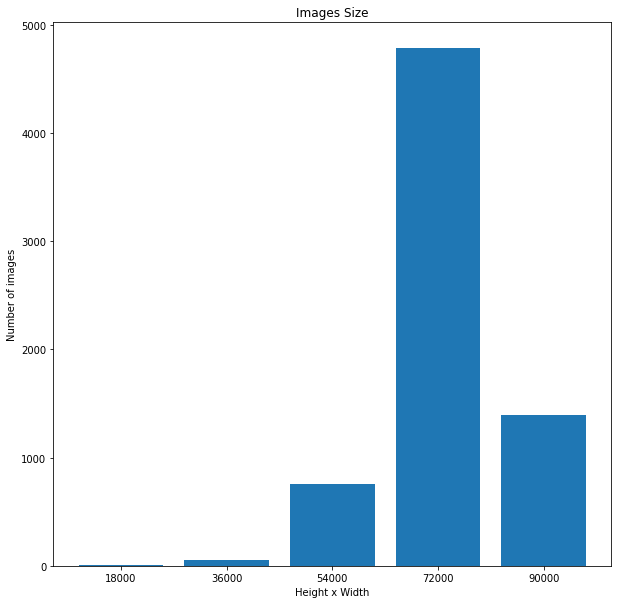

In [131]:
plt.figure(figsize=(10,10))
plt.title('Images Size')
plt.ylabel('Number of images')
plt.xlabel('Height x Width')
plt.bar(range(5),HW,tick_label= r[1:])
plt.show()